In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [168]:
df = pd.read_csv("Earthquakes_database.csv")

In [169]:
df.shape

(23412, 21)

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [171]:
df.describe().transpose()

count        mean         std         min  \
Latitude                    23412.0    1.679033   30.113183  -77.080000   
Longitude                   23412.0   39.639961  125.511959 -179.997000   
Depth                       23412.0   70.767911  122.651898   -1.100000   
Depth Error                  4461.0    4.993115    4.875184    0.000000   
Depth Seismic Stations       7097.0  275.364098  162.141631    0.000000   
Magnitude                   23412.0    5.882531    0.423066    5.500000   
Magnitude Error               327.0    0.071820    0.051466    0.000000   
Magnitude Seismic Stations   2564.0   48.944618   62.943106    0.000000   
Azimuthal Gap                7299.0   44.163532   32.141486    0.000000   
Horizontal Distance          1604.0    3.992660    5.377262    0.004505   
Horizontal Error             1156.0    7.662759   10.430396    0.085000   
Root Mean Square            17352.0    1.022784    0.188545    0.000000   

                                  25%       50%        75%      max  
Latitude                    -18.65300   -3.5685   26.19075   86.005  
Longitude                   -76.34975  103.9820  145.02625  179.998  
Depth                        14.52250   33.0000   54.00000  700.000  
Depth Error                   1.80000    3.5000    6.30000   91.295  
Depth Seismic Stations      146.00000  255.0000  384.00000  934.000  
Magnitude                     5.60000    5.7000    6.00000    9.100  
Magnitude Error               0.04600    0.0590    0.07550    0.410  
Magnitude Seismic Stations   10.00000   28.0000   66.00000  821.000  
Azimuthal Gap                24.10000   36.0000   54.00000  360.000  
Horizontal Distance           0.96875    2.3195    4.72450   37.874  
Horizontal Error              5.30000    6.7000    8.10000   99.000  
Root Mean Square              0.90000    1.0000    1.13000    3.440

In [172]:
df.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [173]:
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  1/2/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  1/4/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  1/5/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  1/8/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  1/9/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                         NaN            NaN                  NaN   
2                         NaN            NaN                  NaN   
3                         NaN            NaN                  NaN   
4                         NaN            NaN                  NaN   

   Horizontal Error  Root Mean Square            ID  Source Location Source  \
0               NaN               NaN  ISCGEM860706  ISCGEM          ISCGEM   
1               NaN               NaN  ISCGEM860737  ISCGEM          ISCGEM   
2               NaN               NaN  ISCGEM860762  ISCGEM          ISCGEM   
3               NaN               NaN  ISCGEM860856  ISCGEM          ISCGEM   
4               NaN               NaN  ISCGEM860890  ISCGEM          ISCGEM   

  Magnitude Source     Status  
0           ISCGEM  Automatic  
1           ISCGEM  Automatic  
2           ISCGEM  Automatic  
3           ISCGEM  Automatic  
4           ISCGEM  Automatic  

[5 rows x 21 columns]

# მონაცემთა წმენდის ფუნქციონალის გამოყენება

In [174]:
# df = df.drop_duplicates()

Magnitude Error, Azimuthal Gap, Horizontal Distance და Horizontal Error სვეტების წაშლა

In [175]:
df = df.drop(columns=["Magnitude Error", "Azimuthal Gap", "Horizontal Distance", "Horizontal Error"])

3 ცალი სტრიქონის წაშლა

In [176]:
df.drop(index=[3378, 7512, 20650], inplace=True)

In [177]:
df.reset_index(drop=True, inplace=True)

In [178]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Seismic Stations', 'Root Mean Square', 'ID', 'Source',
       'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [179]:
df.shape # სვეტების რაოდენობამ დაიკლო 4-ით და სტრიქონებისამ 3-ით

(23409, 17)

Date სვეტში / სიმბოლოების - სიმბოლოებით ჩანაცვლება

In [180]:
df['Date'] = df['Date'].str.replace('/', '-')

In [181]:
df[["Date"]]

Date
0        1-2-1965
1        1-4-1965
2        1-5-1965
3        1-8-1965
4        1-9-1965
...           ...
23404  12-28-2016
23405  12-28-2016
23406  12-28-2016
23407  12-29-2016
23408  12-30-2016

[23409 rows x 1 columns]

In [182]:
df["Root Mean Square"].mean()

1.0227658674351585

In [183]:
df["Root Mean Square"] = df["Root Mean Square"].fillna(df["Root Mean Square"].mean())
# ცარიელი მნიშვნელობების (null-ების) შევსება ამ სვეტის საშუალო მნიშვნელობით

In [184]:
df.isnull().sum() # შედეგად Root Mean Square სვეტში null-ები აღარ გვაქვს

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18949
Depth Seismic Stations        16313
Magnitude                         0
Magnitude Type                    3
Magnitude Seismic Stations    20845
Root Mean Square                  0
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

# რიცხვითი ტიპის ველის მონაცემების დაყოფა კატეგორიებად cut() ფუნქციის გამოყენებით

In [185]:
df["Depth"].max()

700.0

In [186]:
df["Depth"].min()

-1.1

In [187]:
df["Depth"].mean()

70.74852569524542

**In seismology, the depth of focus or focal depth is the depth at which an earthquake occurs. Earthquakes occurring at a depth of less than 70 km (43 mi) are classified as shallow-focus earthquakes, while those with a focal depth between 70 km (43 mi) and 300 km (190 mi) are commonly termed mid-focus or intermediate-depth earthquakes. In subduction zones, where older and colder oceanic crust sinks under another tectonic plate, deep-focus earthquakes may occur at much greater depths in the mantle, ranging from 300 km (190 mi) up to 700 km (430 mi).**

დამატებითი ინფორმაცია შეგიძლიათ იხილოთ მბულზე   https://en.wikipedia.org/wiki/Depth_of_focus_(tectonics)

In [188]:
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  1-2-1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  1-4-1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  1-5-1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  1-8-1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  1-9-1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  \
0                     NaN        6.0             MW   
1                     NaN        5.8             MW   
2                     NaN        6.2             MW   
3                     NaN        5.8             MW   
4                     NaN        5.8             MW   

   Magnitude Seismic Stations  Root Mean Square            ID  Source  \
0                         NaN          1.022766  ISCGEM860706  ISCGEM   
1                         NaN          1.022766  ISCGEM860737  ISCGEM   
2                         NaN          1.022766  ISCGEM860762  ISCGEM   
3                         NaN          1.022766  ISCGEM860856  ISCGEM   
4                         NaN          1.022766  ISCGEM860890  ISCGEM   

  Location Source Magnitude Source     Status  
0          ISCGEM           ISCGEM  Automatic  
1          ISCGEM           ISCGEM  Automatic  
2          ISCGEM           ISCGEM  Automatic  
3          ISCGEM           ISCGEM  Automatic  
4          ISCGEM           ISCGEM  Automatic

სიღრმის სვეტის დაყოფა 3 კატეგორიად: 70-ზე ნაკლები იქნება shallow-focus; 300-ზე ნაკლები იქნება mid-focus ხოლო 300-ზე მეტი იქნება deep-focus

In [189]:
df["Depth_categories"] = pd.cut(
    df["Depth"], 
    bins = [int(df["Depth"].min())-1, 69.99, 299.99, int(df["Depth"].max())+1],
    labels = ["shallow-focus", "mid-focus", "deep-focus"]
)

In [190]:
df["Depth_categories"]

0            mid-focus
1            mid-focus
2        shallow-focus
3        shallow-focus
4        shallow-focus
             ...      
23404    shallow-focus
23405    shallow-focus
23406    shallow-focus
23407        mid-focus
23408    shallow-focus
Name: Depth_categories, Length: 23409, dtype: category
Categories (3, object): ['shallow-focus' < 'mid-focus' < 'deep-focus']

In [191]:
# df[df["Depth"] == 70]

In [192]:
df["Depth_categories"].value_counts() # წარმოდგენილია მიწისძრის სიღრმის 3 კატეგორია თავისი რაოდენობებით

Depth_categories
shallow-focus    18658
mid-focus         3425
deep-focus        1326
Name: count, dtype: int64

# მონაცემთა “Reshaping”-ის ფუნქციებს გამოყენება

In [193]:
df.columns # ცხრილის სვეტების ჩამონათვალი

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Seismic Stations', 'Root Mean Square', 'ID', 'Source',
       'Location Source', 'Magnitude Source', 'Status', 'Depth_categories'],
      dtype='object')

კატასტორფის აღმიცხავი ორგანიზაციების ჩამონათვალი და მის მიერ ჩატარებული აღრიცხვების რაოდენობები

In [194]:
df["Source"].value_counts() 

Source
US           20627
ISCGEM        2460
ISCGEMSUP      120
CI              61
GCMT            55
NC              51
AK              12
OFFICIAL         8
UW               6
NN               4
ATLAS            3
SE               1
PR               1
Name: count, dtype: int64

In [195]:
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  1-2-1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  1-4-1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  1-5-1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  1-8-1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  1-9-1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  \
0                     NaN        6.0             MW   
1                     NaN        5.8             MW   
2                     NaN        6.2             MW   
3                     NaN        5.8             MW   
4                     NaN        5.8             MW   

   Magnitude Seismic Stations  Root Mean Square            ID  Source  \
0                         NaN          1.022766  ISCGEM860706  ISCGEM   
1                         NaN          1.022766  ISCGEM860737  ISCGEM   
2                         NaN          1.022766  ISCGEM860762  ISCGEM   
3                         NaN          1.022766  ISCGEM860856  ISCGEM   
4                         NaN          1.022766  ISCGEM860890  ISCGEM   

  Location Source Magnitude Source     Status Depth_categories  
0          ISCGEM           ISCGEM  Automatic        mid-focus  
1          ISCGEM           ISCGEM  Automatic        mid-focus  
2          ISCGEM           ISCGEM  Automatic    shallow-focus  
3          ISCGEM           ISCGEM  Automatic    shallow-focus  
4          ISCGEM           ISCGEM  Automatic    shallow-focus

თარიღის სვეტის დახლიჩვა - რიცხვად, თვედ და წლად.

In [196]:
df["Date"].str.split("-").explode()

0           1
0           2
0        1965
1           1
1           4
         ... 
23407      29
23407    2016
23408      12
23408      30
23408    2016
Name: Date, Length: 70227, dtype: object

წყაროსა და კატასტროფის ტიპის მიხედვი საშვალო მაგნიტუდებისთვის pivot_table-ის აგება.
replace(np.NaN, "") გამოყენებულია ცხილის უკეთესი აღქმადობისთვის.

In [197]:
df.pivot_table(index='Source', columns='Type', values="Magnitude",  aggfunc='mean').replace(np.NaN, "")

Type       Earthquake Explosion Nuclear Explosion Rock Burst
Source                                                      
AK           5.858333                                       
ATLAS        5.706667                                       
CI           6.024490                    5.664167           
GCMT         5.885455                                       
ISCGEM       6.007805                                       
ISCGEMSUP    6.000833                                       
NC           6.029804                                       
NN           5.725000                                       
OFFICIAL     8.712500                                       
PR           5.800000                                       
SE           5.800000                                       
US           5.865301      5.85          5.864417        6.2
UW           5.966667

წყაროსა და მიწისძვრის სიღრმის კატეგორიისთვის რაოდენობების დათვლა და crosstab-ის ცხრილით ასახვა.

In [198]:
pd.crosstab(df["Source"], df["Depth_categories"])

Depth_categories  shallow-focus  mid-focus  deep-focus
Source                                                
AK                            6          6           0
ATLAS                         3          0           0
CI                           61          0           0
GCMT                         52          2           1
ISCGEM                     1976        361         123
ISCGEMSUP                    46         68           6
NC                           51          0           0
NN                            4          0           0
OFFICIAL                      8          0           0
PR                            0          1           0
SE                            1          0           0
US                        16444       2987        1196
UW                            6          0           0

# დიაგრამები

In [199]:
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  1-2-1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  1-4-1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  1-5-1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  1-8-1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  1-9-1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  \
0                     NaN        6.0             MW   
1                     NaN        5.8             MW   
2                     NaN        6.2             MW   
3                     NaN        5.8             MW   
4                     NaN        5.8             MW   

   Magnitude Seismic Stations  Root Mean Square            ID  Source  \
0                         NaN          1.022766  ISCGEM860706  ISCGEM   
1                         NaN          1.022766  ISCGEM860737  ISCGEM   
2                         NaN          1.022766  ISCGEM860762  ISCGEM   
3                         NaN          1.022766  ISCGEM860856  ISCGEM   
4                         NaN          1.022766  ISCGEM860890  ISCGEM   

  Location Source Magnitude Source     Status Depth_categories  
0          ISCGEM           ISCGEM  Automatic        mid-focus  
1          ISCGEM           ISCGEM  Automatic        mid-focus  
2          ISCGEM           ISCGEM  Automatic    shallow-focus  
3          ISCGEM           ISCGEM  Automatic    shallow-focus  
4          ISCGEM           ISCGEM  Automatic    shallow-focus

ამოღებულია კატასტროგების 4 ტიპი და თითოეული მათგანის მოხდენის რაოდენობები. შემდგომ ამ მონაცემების მიხედვით აგებულია სვეტოვანი დიაგრამა

In [200]:
type_count = df["Type"].value_counts()
type_labels = type_count.index.tolist() # labels of Type column
print(type_labels)
type_counts = type_count.to_numpy()
type_counts # counts of each type

['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst']


array([23229,   175,     4,     1], dtype=int64)

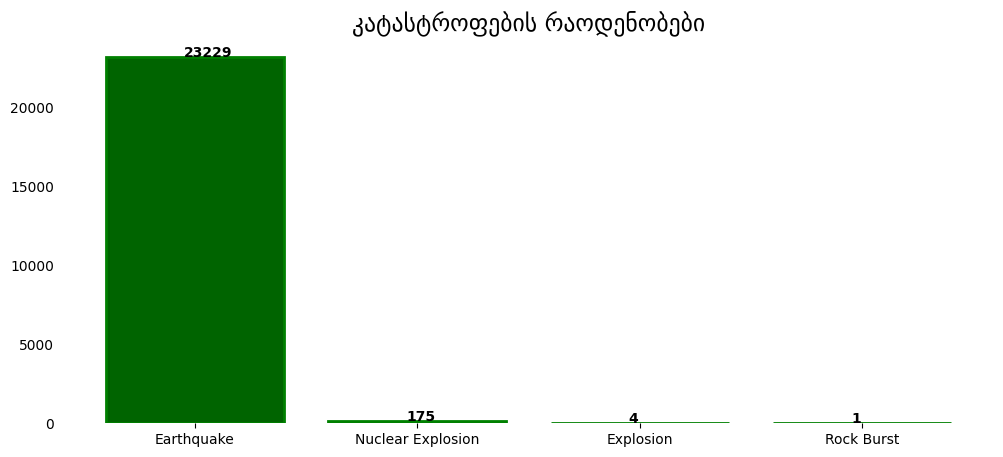

In [201]:
fig, ax = plt.subplots(figsize =(12, 5))
plt.title("კატასტროფების რაოდენობები", fontsize=17) # Writing a title 
ax.bar(type_labels, type_counts, color="darkgreen", edgecolor="green", linewidth=2) 

for bor in ['top', 'bottom', 'left', 'right']: # 
    ax.spines[bor].set_visible(False) # Removing borders

ax.yaxis.set_ticks_position('none') # Removing ticks for Y axis

for i in ax.patches: # for each bar writing its percantage
    plt.text(i.get_x()+0.35, i.get_height(), i.get_height(),
             fontsize = 10, fontweight ='bold',
             color ='black')

მიღებულია მიწისძვრის (კატასტროფის) სიღრმის კატეგორიები
და მათი შესამაბისი პროზენტული მაჩევენბლები.
შემდგომ აგებულია წრიული დიაგრამა

In [202]:
depth_categories_count = df["Depth_categories"].value_counts(normalize=True)
depth_categories_labels = depth_categories_count.index.tolist()
print(depth_categories_labels)
depth_categories_percents = (depth_categories_count.to_numpy() * 100).round(2)
print(depth_categories_percents)

['shallow-focus', 'mid-focus', 'deep-focus']
[79.7  14.63  5.66]


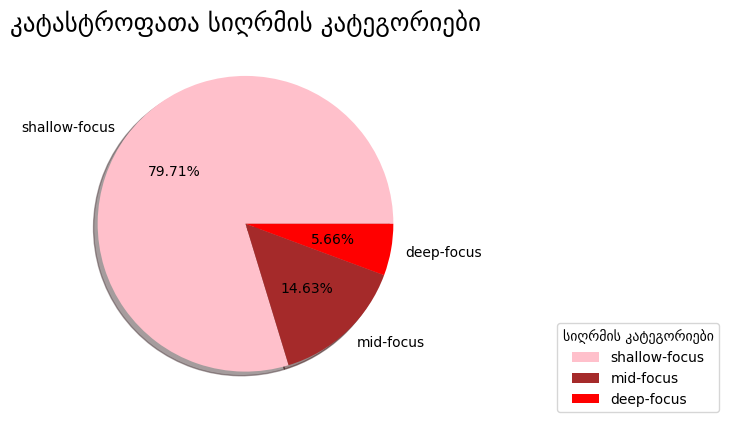

In [203]:
plt.title("კატასტროფათა სიღრმის კატეგორიები", fontsize=18) 
plt.pie(
        depth_categories_percents,
        labels=depth_categories_labels,
        shadow=True,
        colors=['pink', 'brown', "red"],
        autopct="%1.2f%%" )# წრიული დიაგრამის აგება
plt.legend(title="სიღრმის კატეგორიები",  bbox_to_anchor=(1.8,0.25))
plt.show()

აღებულია მაგნიტუტები და მისი დაფიქსირების დრო საათისა და წუთის სიზუსტით. აგებული scatter დიაგრამა, რათა დროის მიხედვით
მაგნიტუდთა გაფანტულობა დავინახოთ. 

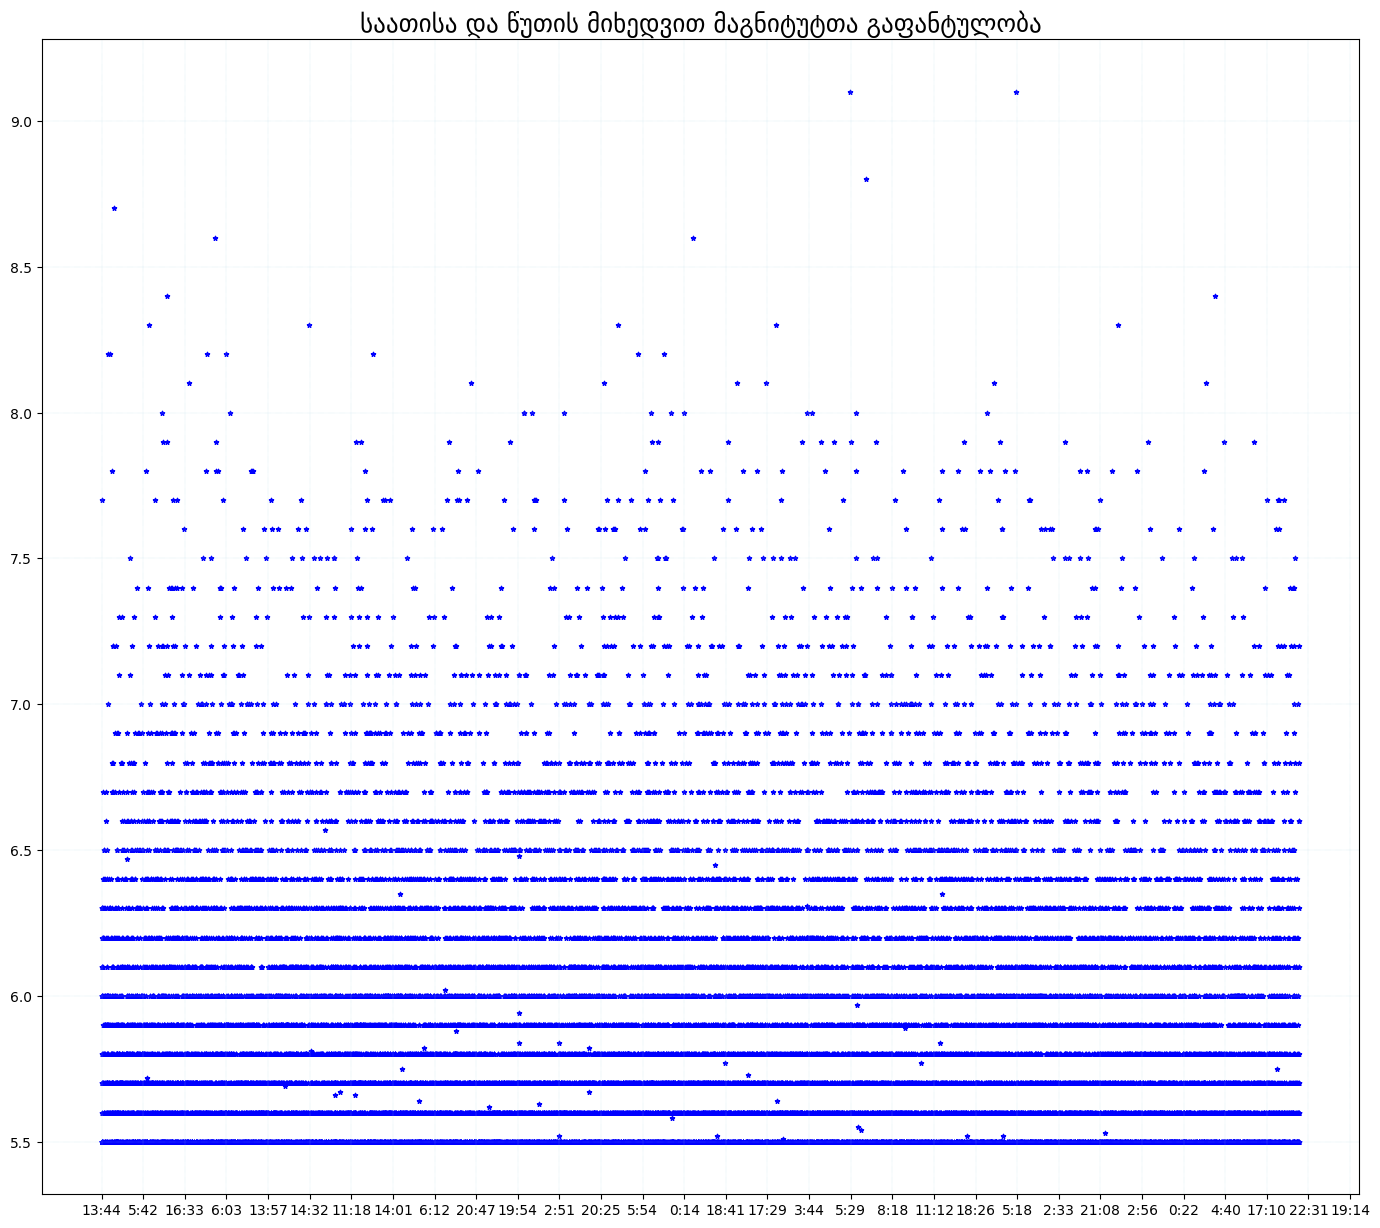

In [204]:
fig, ax = plt.subplots(figsize =(17, 15))
magnitude = df["Magnitude"].values
time = df["Time"]
# print(type(y))

time = time.str[0:5]

for i in range(0, len(time), 1):
    each = time[i]
    if each[len(each)-1] == ":":
        time[i]=each[:-1] 
        
plt.title("საათისა და წუთის მიხედვით მაგნიტუტთა გაფანტულობა", fontsize=18) 
plt.xticks(range(0, len(time), 50), time[::50])
ax.scatter(time, magnitude,  s=10, marker='*', c='blue')
plt.grid(color="lightblue", linestyle=":", linewidth=0.3)

plt.show()

კატასტროფათა სიღრმისთვის აგებულია ჰისტოგრამა

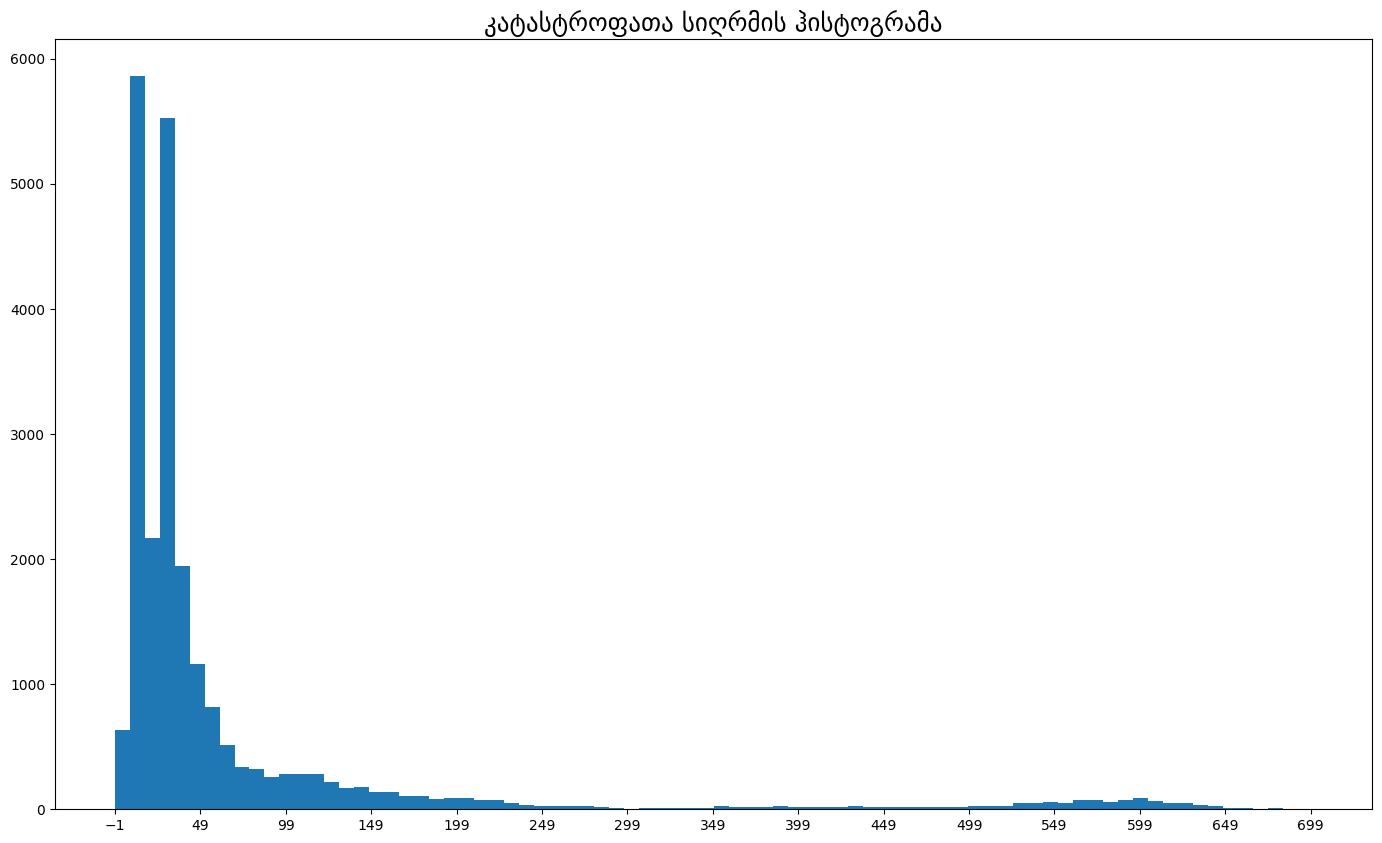

In [205]:
fig, ax = plt.subplots(figsize =(17, 10))
plt.title("კატასტროფათა სიღრმის ჰისტოგრამა", fontsize=18) 
plt.hist(df["Depth"], bins=80)
plt.xticks(np.arange(int(df["Depth"].min()), int(df["Depth"].max())+10, 50))
plt.show()

# თარიღებთან სამუშაო ფუნქციები / ტრანსფორმაციები

In [208]:
type(df["Date"][0])

str

In [210]:
df[["Date"]]

Date
0        1-2-1965
1        1-4-1965
2        1-5-1965
3        1-8-1965
4        1-9-1965
...           ...
23404  12-28-2016
23405  12-28-2016
23406  12-28-2016
23407  12-29-2016
23408  12-30-2016

[23409 rows x 1 columns]

Date სვეტში მნიშვნელობების დალაგება შემდეგი თანმიმდევრობით: დღე, თვე, წელი

In [ ]:
for i in range(0, len(df["Date"]), 1):
    date_list = df.loc[i, "Date"].split('-')
    year = date_list[2]
    if int(date_list[1])<=12:
        month = date_list[1]
        day = date_list[0]
    else:
        month = date_list[0]
        day = date_list[1]
    df.loc[i, "Date"] = day+"-"+month+"-"+year  
    print(df["Date"])

0          1-2-1965
1          1-4-1965
2          1-5-1965
3          1-8-1965
4          1-9-1965
            ...    
23404    12-28-2016
23405    12-28-2016
23406    12-28-2016
23407    12-29-2016
23408    12-30-2016
Name: Date, Length: 23409, dtype: object
0          1-2-1965
1          1-4-1965
2          1-5-1965
3          1-8-1965
4          1-9-1965
            ...    
23404    12-28-2016
23405    12-28-2016
23406    12-28-2016
23407    12-29-2016
23408    12-30-2016
Name: Date, Length: 23409, dtype: object
0          1-2-1965
1          1-4-1965
2          1-5-1965
3          1-8-1965
4          1-9-1965
            ...    
23404    12-28-2016
23405    12-28-2016
23406    12-28-2016
23407    12-29-2016
23408    12-30-2016
Name: Date, Length: 23409, dtype: object
0          1-2-1965
1          1-4-1965
2          1-5-1965
3          1-8-1965
4          1-9-1965
            ...    
23404    12-28-2016
23405    12-28-2016
23406    12-28-2016
23407    12-29-2016
23408    12-30-20

Datetime სვეტის დამატება რომელიც მიიღება Date და Time

In [212]:
df["DateTime"] = df["Date"] + " "+ df["Time"]

In [213]:
type(df.loc[6, "DateTime"])

str

In [214]:
df.loc[6, "DateTime"]

'1-12-1965 13:32:25'

In [215]:
df["DateTime"] = pd.to_datetime(df["DateTime"], format='%d-%m-%Y %H:%M:%S')

In [216]:
df.set_index('DateTime', inplace=True)

In [217]:
df.index

DatetimeIndex(['1965-02-01 13:44:18', '1965-04-01 11:29:49',
               '1965-05-01 18:05:58', '1965-08-01 18:49:43',
               '1965-09-01 13:32:50', '1965-10-01 13:36:32',
               '1965-12-01 13:32:25', '1965-01-15 23:17:42',
               '1965-01-16 11:32:37', '1965-01-17 10:43:17',
               ...
               '2016-12-24 03:58:55', '2016-12-25 14:22:27',
               '2016-12-25 14:32:13', '2016-12-27 23:20:56',
               '2016-12-28 08:18:01', '2016-12-28 08:22:12',
               '2016-12-28 09:13:47', '2016-12-28 12:38:51',
               '2016-12-29 22:30:19', '2016-12-30 20:08:28'],
              dtype='datetime64[ns]', name='DateTime', length=23409, freq=None)

In [227]:
df.loc['2005-01']

Date      Time  Latitude  Longitude        Type  \
DateTime                                                                    
2005-01-01 01:55:28   1-1-2005   1:55:28     2.910     95.623  Earthquake   
2005-01-01 04:03:11   1-1-2005   4:03:11     5.465     94.398  Earthquake   
2005-01-01 06:25:45   1-1-2005   6:25:45     5.099     92.304  Earthquake   
2005-01-01 14:29:11   1-1-2005  14:29:11     8.115     93.218  Earthquake   
2005-01-01 19:08:08   1-1-2005  19:08:08     7.336     94.455  Earthquake   
...                        ...       ...       ...        ...         ...   
2005-01-08 04:40:37   8-1-2005   4:40:37    46.995    153.911  Earthquake   
2005-01-09 11:22:10   9-1-2005  11:22:10   -24.411    179.892  Earthquake   
2005-01-10 21:54:09  10-1-2005  21:54:09   -23.609    -63.632  Earthquake   
2005-01-11 21:13:32  11-1-2005  21:13:32    -3.592    127.325  Earthquake   
2005-01-12 03:08:40  12-1-2005   3:08:40   -21.021   -179.105  Earthquake   

                     Depth  Depth Error  Depth Seismic Stations  Magnitude  \
DateTime                                                                     
2005-01-01 01:55:28   24.5          NaN                   129.0        5.7   
2005-01-01 04:03:11   36.0          NaN                   355.0        5.7   
2005-01-01 06:25:45   11.7          NaN                   364.0        6.7   
2005-01-01 14:29:11   27.0         14.5                   142.0        5.5   
2005-01-01 19:08:08   55.4         10.4                   279.0        6.1   
...                    ...          ...                     ...        ...   
2005-01-08 04:40:37   16.9          NaN                   435.0        5.7   
2005-01-09 11:22:10  513.2          NaN                   172.0        5.6   
2005-01-10 21:54:09  547.4          NaN                   417.0        5.6   
2005-01-11 21:13:32   12.7          NaN                   196.0        5.7   
2005-01-12 03:08:40  644.7          NaN                   341.0        5.5   

                    Magnitude Type  Magnitude Seismic Stations  \
DateTime                                                         
2005-01-01 01:55:28            MWB                         NaN   
2005-01-01 04:03:11            MWB                         NaN   
2005-01-01 06:25:45            MWC                         NaN   
2005-01-01 14:29:11            MWC                         NaN   
2005-01-01 19:08:08            MWB                         NaN   
...                            ...                         ...   
2005-01-08 04:40:37            MWB                         NaN   
2005-01-09 11:22:10            MWC                         NaN   
2005-01-10 21:54:09            MWB                         NaN   
2005-01-11 21:13:32            MWB                         NaN   
2005-01-12 03:08:40            MWC                         NaN   

                     Root Mean Square          ID Source Location Source  \
DateTime                                                                   
2005-01-01 01:55:28              0.79  USP000DCB7     US              US   
2005-01-01 04:03:11              0.88  USP000DCBA     US              US   
2005-01-01 06:25:45              0.97  USP000DCBH     US              US   
2005-01-01 14:29:11              0.96  USP000DCC6     US              US   
2005-01-01 19:08:08              0.96  USP000DCCN     US              US   
...                               ...         ...    ...             ...   
2005-01-08 04:40:37              0.88  USP000DWEG     US              US   
2005-01-09 11:22:10              0.97  USP000DYGF     US              US   
2005-01-10 21:54:09              0.78  USP000E0P3     US              US   
2005-01-11 21:13:32              0.90  USP000E3AE     US              US   
2005-01-12 03:08:40              0.82  USP000E58X     US              US   

                    Magnitude Source    Status Depth_categories  
DateTime                                                         
2005-01-01 01:55:28          

In [219]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Seismic Stations', 'Root Mean Square', 'ID', 'Source',
       'Location Source', 'Magnitude Source', 'Status', 'Depth_categories'],
      dtype='object')

In [230]:
df.index

DatetimeIndex(['1965-02-01 13:44:18', '1965-04-01 11:29:49',
               '1965-05-01 18:05:58', '1965-08-01 18:49:43',
               '1965-09-01 13:32:50', '1965-10-01 13:36:32',
               '1965-12-01 13:32:25', '1965-01-15 23:17:42',
               '1965-01-16 11:32:37', '1965-01-17 10:43:17',
               ...
               '2016-12-24 03:58:55', '2016-12-25 14:22:27',
               '2016-12-25 14:32:13', '2016-12-27 23:20:56',
               '2016-12-28 08:18:01', '2016-12-28 08:22:12',
               '2016-12-28 09:13:47', '2016-12-28 12:38:51',
               '2016-12-29 22:30:19', '2016-12-30 20:08:28'],
              dtype='datetime64[ns]', name='DateTime', length=23409, freq=None)

In [231]:
filt = (df.index >= pd.to_datetime('2000-01-01')) & (df.index < pd.to_datetime('2000-02-01'))
df.loc[filt]

Date      Time  Latitude  Longitude        Type  \
DateTime                                                                    
2000-01-01 05:58:20   1-1-2000   5:58:20   -60.722    153.670  Earthquake   
2000-01-13 20:07:14  13-1-2000  20:07:14   -17.610   -178.742  Earthquake   
2000-01-14 18:44:44  14-1-2000  18:44:44   -15.285   -173.525  Earthquake   
2000-01-14 22:09:05  14-1-2000  22:09:05    25.591    101.164  Earthquake   
2000-01-14 23:37:08  14-1-2000  23:37:08    25.607    101.063  Earthquake   
2000-01-15 02:04:01  15-1-2000   2:04:01    -6.345    148.430  Earthquake   
2000-01-15 12:49:45  15-1-2000  12:49:45   -21.216   -179.255  Earthquake   
2000-01-16 15:00:41  16-1-2000  15:00:41   -30.238   -178.133  Earthquake   
2000-01-16 23:19:43  16-1-2000  23:19:43   -11.656    166.317  Earthquake   
2000-01-17 00:04:01  17-1-2000   0:04:01   -11.593    166.301  Earthquake   
2000-01-17 12:20:05  17-1-2000  12:20:05     6.785    -71.971  Earthquake   
2000-01-17 21:18:05  17-1-2000  21:18:05   -14.512   -177.596  Earthquake   
2000-01-18 01:31:36  18-1-2000   1:31:36   -14.319   -177.675  Earthquake   
2000-01-19 07:09:34  19-1-2000   7:09:34    36.372     70.379  Earthquake   
2000-01-20 00:59:24  20-1-2000   0:59:24   -28.227   -176.563  Earthquake   
2000-01-20 05:54:34  20-1-2000   5:54:34    -6.261    147.555  Earthquake   
2000-01-20 06:13:03  20-1-2000   6:13:03    56.618   -161.869  Earthquake   
2000-01-20 09:41:47  20-1-2000   9:41:47    43.649   -127.257  Earthquake   
2000-01-21 03:12:00  21-1-2000   3:12:00    13.147    125.755  Earthquake   
2000-01-21 05:04:11  21-1-2000   5:04:11   -59.287    -17.224  Earthquake   
2000-01-22 21:14:32  22-1-2000  21:14:32   -17.657     66.857  Earthquake   
2000-01-23 06:08:25  23-1-2000   6:08:25    -7.967    120.613  Earthquake   
2000-01-23 07:40:05  23-1-2000   7:40:05    30.239    130.768  Earthquake   
2000-01-23 08:03:01  23-1-2000   8:03:01    -7.973    120.646  Earthquake   
2000-01-23 08:42:24  23-1-2000   8:42:24    57.527   -149.111  Earthquake   
2000-01-23 09:57:02  23-1-2000   9:57:02   -17.513   -176.731  Earthquake   
2000-01-23 22:14:47  23-1-2000  22:14:47   -17.207   -177.226  Earthquake   
2000-01-26 13:26:50  26-1-2000  13:26:50   -17.272   -174.002  Earthquake   
2000-01-28 13:17:53  28-1-2000  13:17:53    -7.485    122.678  Earthquake   
2000-01-28 14:21:07  28-1-2000  14:21:07    43.046    146.837  Earthquake   
2000-01-28 16:39:24  28-1-2000  16:39:24    26.076    124.496  Earthquake   
2000-01-28 22:42:26  28-1-2000  22:42:26    -1.347     89.083  Earthquake   
2000-01-28 22:57:52  28-1-2000  22:57:52    -9.691    118.764  Earthquake   
2000-01-03 04:21:01   3-1-2000   4:21:01   -19.005   -179.361  Earthquake   
2000-01-03 04:46:30   3-1-2000   4:46:30   -19.103   -179.361  Earthquake   
2000-01-03 23:05:15   3-1-2000  23:05:15    60.167   -145.887  Earthquake   
2000-01-04 12:10:50   4-1-2000  12:10:50   -17.899   -178.645  Earthquake   
2000-01-04 12:13:24   4-1-2000  12:13:24   -17.756   -178.754  Earthquake   
2000-01-05 18:41:42   5-1-2000  18:41:42    38.176     73.053  Earthquake   
2000-01-07 04:48:55   7-1-2000   4:48:55   -35.226    178.605  Earthquake   
2000-01-07 07:01:56   7-1-2000   7:01:56    34.221    139.131  Earthquake   
2000-01-08 09:21:37   8-1-2000   9:21:37   -16.817    174.361  Earthquake   
2000-01-08 18:54:46   8-1-2000  18:54:46   -38.765     78.419  Earthquake   
2000-01-09 11:56:52   9-1-2000  11:56:52     1.438     96.591  Earthquake   
2000-01-10 19:03:28  10-1-2000  19:03:28    -4.046    127.334  Earthquake   
2000-01-11 04:27:46  11-1-2000   4:27:46    -7.950    -74.422  Earthquake   
2000-01-11 10:35:55  11-1-2000  10:35:55   -45.070    167.009  Earthquake   
2000-01-12 13:27:34  12-1-2000  13:27:34    35.255    -35.328  Earthquake   

                     Depth  Depth Error  Depth Seismic Stations  Magnitude  \
DateTime                                                                     
2000-01-01 05:58:20

თითოეული დღისთვის იმ დღეს დაფიქსირებული მაქსიმალური სიღრმე

In [220]:
df["Depth"].resample('D').max() 

DateTime
1965-01-02    482.90
1965-01-03    105.20
1965-01-04     60.00
1965-01-05     15.00
1965-01-06       NaN
               ...  
2016-12-26       NaN
2016-12-27     97.00
2016-12-28     12.30
2016-12-29     79.00
2016-12-30     11.94
Freq: D, Name: Depth, Length: 18991, dtype: float64

თითეოული წლისთვის იმ წელს დაფიქსირებული მაქიმალური მაგნიტუტი

In [221]:
Magni = df["Magnitude"].resample('Y').max()

In [222]:
Magni

DateTime
1965-12-31    8.7
1966-12-31    8.1
1967-12-31    7.4
1968-12-31    8.2
1969-12-31    7.8
1970-12-31    8.0
1971-12-31    8.1
1972-12-31    8.0
1973-12-31    7.7
1974-12-31    7.6
1975-12-31    7.9
1976-12-31    8.0
1977-12-31    7.9
1978-12-31    7.7
1979-12-31    7.9
1980-12-31    7.9
1981-12-31    7.7
1982-12-31    7.2
1983-12-31    7.6
1984-12-31    7.6
1985-12-31    8.0
1986-12-31    8.0
1987-12-31    7.9
1988-12-31    7.8
1989-12-31    8.2
1990-12-31    7.8
1991-12-31    7.6
1992-12-31    7.8
1993-12-31    7.8
1994-12-31    8.3
1995-12-31    8.0
1996-12-31    8.2
1997-12-31    7.8
1998-12-31    8.1
1999-12-31    7.7
2000-12-31    8.0
2001-12-31    8.4
2002-12-31    7.9
2003-12-31    8.3
2004-12-31    9.1
2005-12-31    8.6
2006-12-31    8.3
2007-12-31    8.4
2008-12-31    7.9
2009-12-31    8.1
2010-12-31    8.8
2011-12-31    9.1
2012-12-31    8.6
2013-12-31    8.3
2014-12-31    8.2
2015-12-31    8.3
2016-12-31    7.9
Freq: A-DEC, Name: Magnitude, dtype: float64

წლების მიხედვით მაქსიმალური დაფიქსირებული მაგნიტუტის დასაკვირვებლად ხაზოვანი დიაგრამის აგება

<Axes: xlabel='DateTime'>

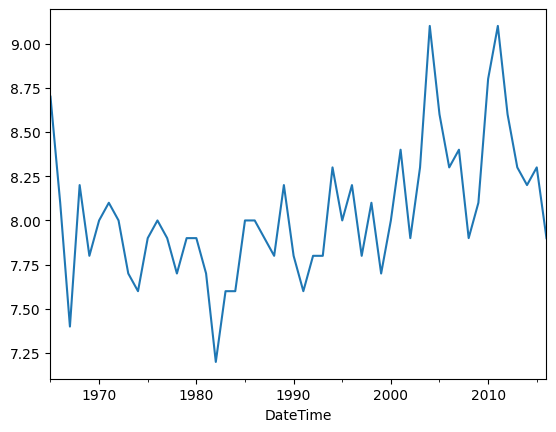

In [223]:
Magni.plot()

თითოეული კვირისთვის Magnitude-ისა და Depth-ის გამოტანა მე-21 საუკუნეში

In [224]:
df[["Magnitude", "Depth"]].resample('W').mean().loc['2000-01':]

Magnitude       Depth
DateTime                         
2000-01-02   5.941667   63.150000
2000-01-09   5.754545  272.536364
2000-01-16   5.841667  135.841667
2000-01-23   5.700000   50.038889
2000-01-30   5.950000  159.383333
...               ...         ...
2016-12-04   5.780000   39.126000
2016-12-11   5.922222   85.385556
2016-12-18   6.016667   88.159167
2016-12-25   6.110000   32.901000
2017-01-01   5.714286   32.834286

[888 rows x 2 columns]

In [225]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Seismic Stations', 'Root Mean Square', 'ID', 'Source',
       'Location Source', 'Magnitude Source', 'Status', 'Depth_categories'],
      dtype='object')

**თითეული თვისათვის**
* Magnitude-ის მაქსიმალური მნიშვნელობა, მინიმალური მნიშვნელობა და სტანდარტული გადახრა
* Depth-სთვის მაქსიმალური მნიშვნელობა
* Depth Error-სთვის მინიმალური მნიშვნელობა

In [226]:
df.resample('M').agg({'Magnitude':['mean', 'min', 'std'], 'Depth':'max', "Depth Error": "min"})

Magnitude                  Depth Depth Error
                mean  min       std     max         min
DateTime                                               
1965-01-31  5.966667  5.5  0.589350  565.00         NaN
1965-02-28  6.026087  5.5  0.573044  540.00         NaN
1965-03-31  6.190625  5.6  0.529369  593.80         NaN
1965-04-30  6.020930  5.6  0.552724  480.00         NaN
1965-05-31  5.920000  5.5  0.444429  560.80         NaN
...              ...  ...       ...     ...         ...
2016-08-31  5.957778  5.5  0.526778  533.00         1.2
2016-09-30  5.833333  5.5  0.375555  596.40         1.6
2016-10-31  5.862500  5.5  0.331743  614.00         1.7
2016-11-30  5.931707  5.5  0.502215  481.00         1.1
2016-12-31  5.948889  5.5  0.537512  622.54         1.2

[624 rows x 5 columns]